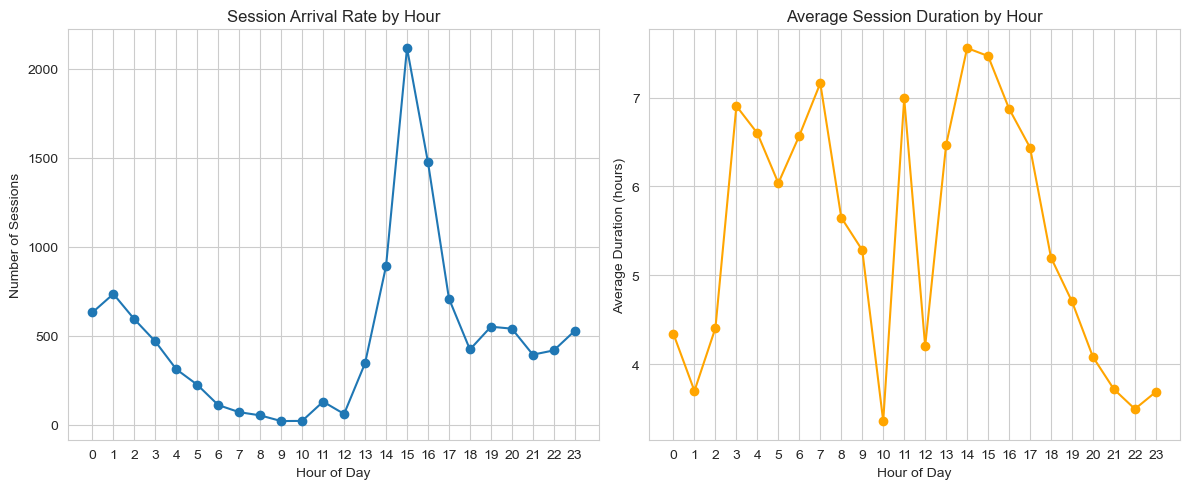

Arrival Rate by Hour:
hour
0      630
1      734
2      592
3      467
4      311
5      224
6      110
7       70
8       52
9       20
10      21
11     129
12      60
13     345
14     890
15    2115
16    1473
17     708
18     422
19     550
20     539
21     393
22     417
23     527
dtype: int64

Average Session Duration by Hour (in hours):
hour
0     4.339456
1     3.698330
2     4.406499
3     6.905693
4     6.598889
5     6.037323
6     6.571465
7     7.162329
8     5.650000
9     5.282917
10    3.359193
11    6.990418
12    4.201898
13    6.470010
14    7.557685
15    7.468058
16    6.875583
17    6.437886
18    5.199063
19    4.705216
20    4.080679
21    3.717125
22    3.495236
23    3.688063
Name: session_duration, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

# =============================================================================
# 1. LOAD THE DATA
# =============================================================================
df = pd.read_csv('acndata_sessions.csv')

# =============================================================================
# 2. DATA CLEANING AND FILTERING
# =============================================================================
df.dropna(subset=['sessionID', 'connectionTime', 'disconnectTime'], inplace=True)

# Ensure connectionTime and disconnectTime are in datetime format.
df['connectionTime'] = pd.to_datetime(df['connectionTime'], errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], errors='coerce')
df.dropna(subset=['connectionTime', 'disconnectTime'], inplace=True)

# Calculate session duration in hours.
df['session_duration'] = (df['disconnectTime'] - df['connectionTime']).dt.total_seconds() / 3600.0

# =============================================================================
# 3. PLOTTING ARRIVAL RATE AND AVERAGE SESSION DURATION BY HOUR
# =============================================================================

# Extract hour from connectionTime.
df['hour'] = df['connectionTime'].dt.hour

# Calculate the arrival rate: number of sessions per hour.
arrival_rate = df.groupby('hour').size()

# Calculate the average session duration per hour.
avg_duration = df.groupby('hour')['session_duration'].mean()

# Set up the figure and subplots.
plt.figure(figsize=(12, 5))

# Plot the arrival rate.
plt.subplot(1, 2, 1)
plt.plot(arrival_rate.index, arrival_rate.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sessions')
plt.title('Session Arrival Rate by Hour')
plt.xticks(range(0, 24))

# Plot the average session duration.
plt.subplot(1, 2, 2)
plt.plot(avg_duration.index, avg_duration.values, marker='o', color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (hours)')
plt.title('Average Session Duration by Hour')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

# Optionally, print the computed metrics for verification.
print("Arrival Rate by Hour:")
print(arrival_rate.sort_index())
print("\nAverage Session Duration by Hour (in hours):")
print(avg_duration.sort_index())